<a href="https://colab.research.google.com/github/aqkarina-queiroz/estudos-dados/blob/main/case_nps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instale as bibliotecas
!pip install pandas matplotlib seaborn

# Importe as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('case_base_dados_nps.csv', sep=';', encoding='latin1')


df.head()

,Safra,Canal,Classificação NPS,Houve Comentário,Tema Comentário,Teor Comentário
0,202302,INTERNET BANKING,DETRATOR,Não,NaN,NaN
1,202302,INTERNET BANKING,PROMOTOR,Sim,COBRANCA/BOLETOS/DDA,DUVIDA
2,202302,INTERNET BANKING,DETRATOR,Não,NaN,NaN
3,202304,INTERNET BANKING,DETRATOR,Não,NaN,NaN
4,202304,INTERNET BANKING,DETRATOR,Sim,OUTROS,NEUTRO


In [ ]:
def nps_num(classe):
    if pd.isnull(classe):
        return None
    classe = classe.strip().upper()
    if classe == 'PROMOTOR':
        return 1
    elif classe == 'NEUTRO':
        return 0
    elif classe == 'DETRATOR':
        return -1
    else:
        return None

    Safra        NPS
0  202301   8.347826
1  202302   0.330579
2  202303 -10.106383
3  202304  -4.975923
4  202305   5.110733
5  202306   1.446945


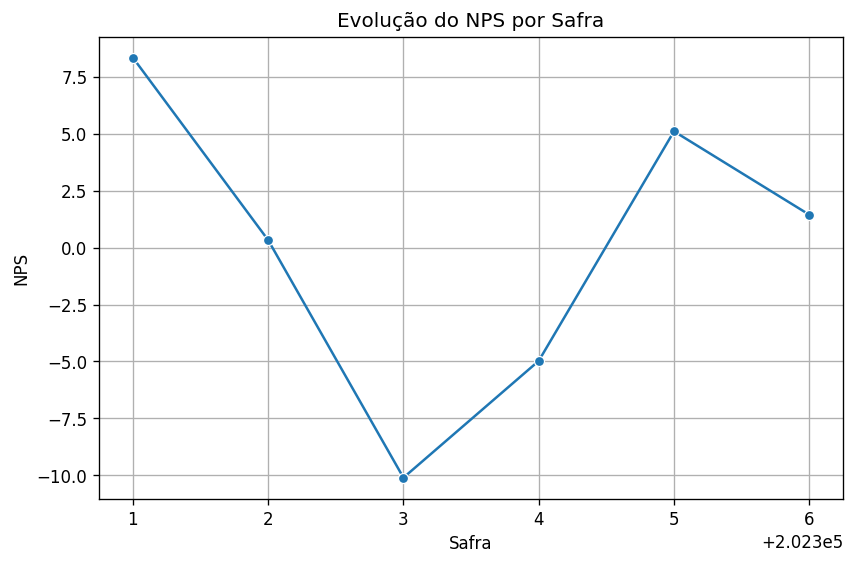

In [ ]:
# Calcula o NPS por safra
nps_safra = df.groupby('Safra')['NPS_num'].mean() * 100
nps_safra = nps_safra.reset_index()
nps_safra.columns = ['Safra', 'NPS']

# Mostra a tabela
print(nps_safra)

# Gráfico da evolução
plt.figure(figsize=(8,5))
sns.lineplot(data=nps_safra, x='Safra', y='NPS', marker='o')
plt.title('Evolução do NPS por Safra')
plt.ylabel('NPS')
plt.xlabel('Safra')
plt.grid(True)
plt.show()

              Canal       NPS
0  INTERNET BANKING  0.590319


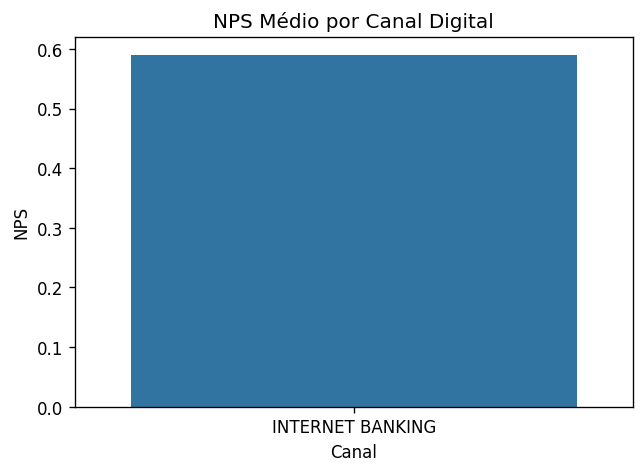

In [ ]:
# Calcula o NPS médio por canal
nps_canal = df.groupby('Canal')['NPS_num'].mean() * 100
nps_canal = nps_canal.reset_index()
nps_canal.columns = ['Canal', 'NPS']

# Mostra a tabela
print(nps_canal)

# Gráfico
plt.figure(figsize=(6,4))
sns.barplot(data=nps_canal, x='Canal', y='NPS')
plt.title('NPS Médio por Canal Digital')
plt.ylabel('NPS')
plt.xlabel('Canal')
plt.show()

              Tema_Comentario  Qtd
0                      OUTROS  326
1  ATENDIMENTO/RELACIONAMENTO  263
2  USABILIDADE/NAVEGABILIDADE  104
3    PERFORMANCE/ESTABILIDADE   24
4    SEGURANCA/CONFIABILIDADE   18
5         TARIFAS/PRECO/JUROS   13
6        EXTRATO/COMPROVANTES    7
7       CREDITO/LIMITE/CARTAO    6
8        COBRANCA/BOLETOS/DDA    5
9         INTEGRACAO/SISTEMAS    5


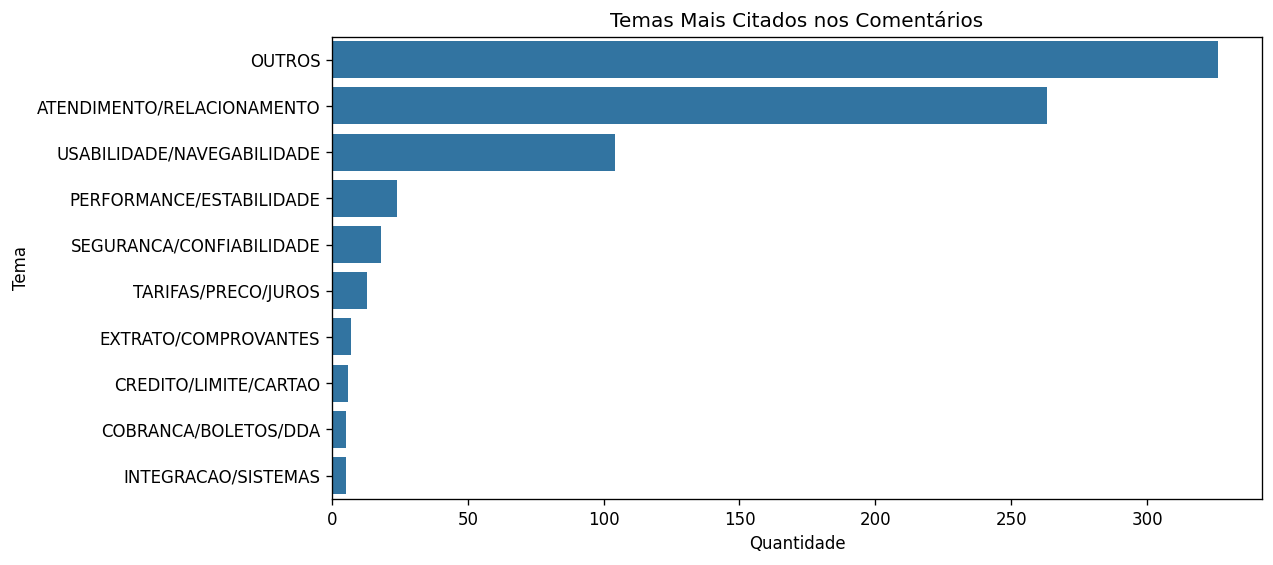

In [ ]:
# Filtra só quem deixou comentário
temas = df[df['Houve_Comentario'] == 'Sim']

# Conta os temas mais citados
temas_count = temas['Tema_Comentario'].value_counts().reset_index()
temas_count.columns = ['Tema_Comentario', 'Qtd']

# Mostra os 10 principais
print(temas_count.head(10))

# Gráfico
plt.figure(figsize=(10,5))
sns.barplot(data=temas_count.head(10), x='Qtd', y='Tema_Comentario')
plt.title('Temas Mais Citados nos Comentários')
plt.xlabel('Quantidade')
plt.ylabel('Tema')
plt.show()

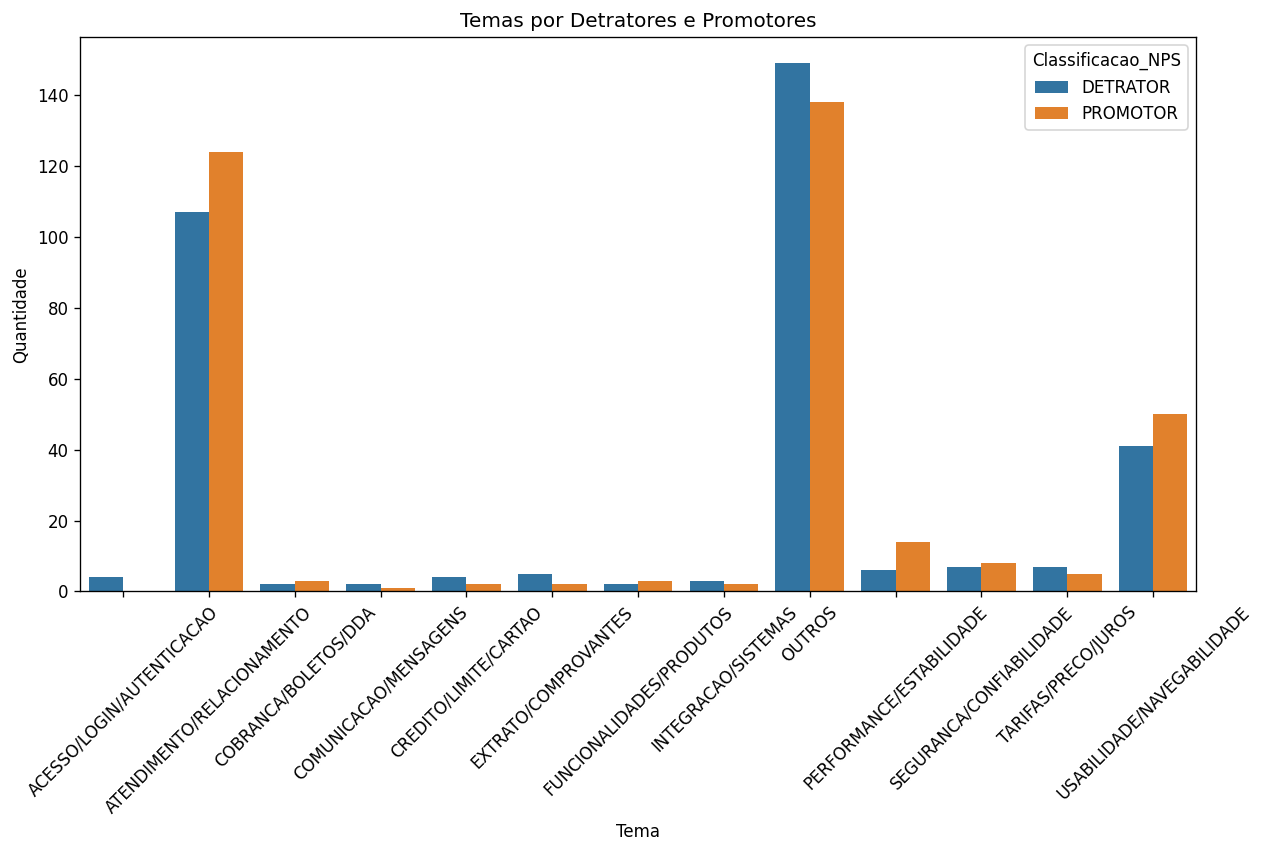

In [ ]:
# Filtra só quem comentou e é Detrator ou Promotor
temas_dp = temas[temas['Classificacao_NPS'].isin(['DETRATOR', 'PROMOTOR'])]

# Conta temas por grupo
temas_dp_count = temas_dp.groupby(['Classificacao_NPS', 'Tema_Comentario']).size().reset_index(name='Qtd')

# Gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=temas_dp_count, x='Tema_Comentario', y='Qtd', hue='Classificacao_NPS')
plt.title('Temas por Detratores e Promotores')
plt.xlabel('Tema')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Safra com maior e menor NPS
maior = nps_safra.loc[nps_safra['NPS'].idxmax()]
menor = nps_safra.loc[nps_safra['NPS'].idxmin()]
print(f"Safra com maior NPS: {maior['Safra']} ({maior['NPS']:.1f})")
print(f"Safra com menor NPS: {menor['Safra']} ({menor['NPS']:.1f})")

# Tema mais citado
tema_top = temas_count.iloc[0]
print(f"Tema mais citado: {tema_top['Tema_Comentario']} ({tema_top['Qtd']} menções)")

# Porcentagem de respondentes que deixam comentário
perc_comentario = (df['Houve_Comentario'] == 'Sim').mean() * 100
print(f"Porcentagem de respondentes que deixam comentário: {perc_comentario:.1f}%")

Safra com maior NPS: 202301.0 (8.3)
Safra com menor NPS: 202303.0 (-10.1)
Tema mais citado: OUTROS (326 menções)
Porcentagem de respondentes que deixam comentário: 23.2%
